# <span style="color:#ff5f27;">🕵🏻‍♂️ Bitcoin Data Analysis</span>
---

### <span style="color:#ff5f27;"> 📝 Imports</span>

In [1]:
# !pip install statsmodels

In [2]:
import pandas as pd
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

### <span style="color:#ff5f27;"> 💽 Loading Data</span>

In [3]:
df = pd.read_csv("btc_raw_600.csv", index_col=0, parse_dates=["date"])

df.head()

,date,open,high,low,close,volume,quote_av,trades,tb_base_av,tb_quote_av,unix
0,2020-11-27,17149.47,17457.62,16438.08,17139.52,85297.024787,1.446670e+09,1572299,42507.358433,7.209856e+08,1606428000000
1,2020-11-28,17139.53,17880.49,16865.56,17719.85,64910.699970,1.128062e+09,1209385,31785.706898,5.520447e+08,1606514400000
2,2020-11-29,17719.84,18360.05,17517.00,18184.99,55329.016303,9.967438e+08,1141289,27883.985296,5.022877e+08,1606600800000
3,2020-11-30,18185.00,19863.16,18184.99,19695.87,115463.466888,2.205929e+09,1744149,61033.414903,1.166944e+09,1606687200000
4,2020-12-01,19695.87,19888.00,18001.12,18764.96,127698.762652,2.446070e+09,2023802,63805.392898,1.223283e+09,1606773600000


In [4]:
df.shape

(600, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         600 non-null    datetime64[ns]
 1   open         600 non-null    float64       
 2   high         600 non-null    float64       
 3   low          600 non-null    float64       
 4   close        600 non-null    float64       
 5   volume       600 non-null    float64       
 6   quote_av     600 non-null    float64       
 7   trades       600 non-null    int64         
 8   tb_base_av   600 non-null    float64       
 9   tb_quote_av  600 non-null    float64       
 10  unix         600 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 56.2 KB


---

### <span style="color:#ff5f27;">🔬 🧬 Data Analysis</span>

In [6]:
fig = go.Figure()

trace1 = go.Scatter(
    x=df['date'],
    y=df['close'].astype(float),
    mode='lines',
    name='Close'
)

layout = dict(
    title='Historical Bitcoin Prices',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1 month',
                     step='month',
                     stepmode='backward'),
                dict(count=1,
                     label='1 year',
                     step='year',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)

fig.add_trace(trace1)
fig.update_layout(layout)
fig.update_traces(hovertemplate='Data: %{x} <br>Price: %{y}') 
fig.update_yaxes(fixedrange=False)

fig.show()

In [7]:
fig = go.Figure()

trace1 = go.Scatter(
    x = df['date'],
    y = df['volume'],
    mode='lines',
    name='Bitcoin Volume'
)

layout = dict(
    title='Historical Bitcoin Volume',
    xaxis=dict(
        rangeslider=dict(
            visible=True
        ),
        type='date'
    )
)

fig.add_trace(trace1)
fig.update_layout(layout)
fig.update_traces(hovertemplate='Data: %{x} <br>Volume: %{y}') 

fig.show()

---

### <span style="color:#ff5f27;">🔬 Correlation Matrix</span>

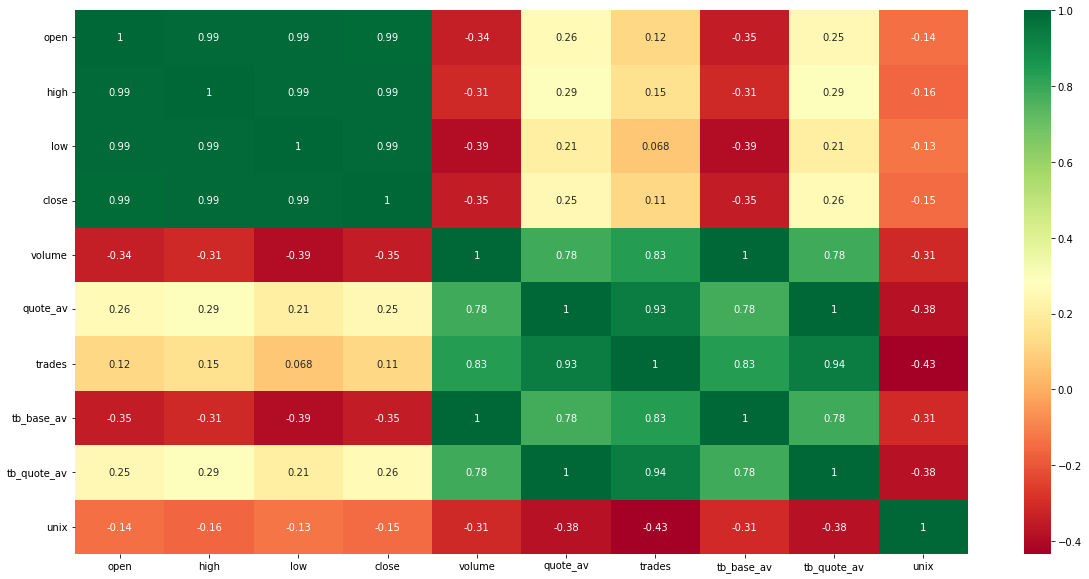

In [8]:
corr_matrix = df.drop('date', axis=1).corr(method='spearman')

plt.figure(figsize=(20,10))

sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

plt.show() 

---
### <span style="color:#ff5f27;">🧑🏻‍🏫 Dickey-Fuller Test + Decomposition</span>

In [9]:
df_temp = df.set_index('date')[['close']]
df_temp.head()

,close
date,
2020-11-27,17139.52
2020-11-28,17719.85
2020-11-29,18184.99
2020-11-30,19695.87
2020-12-01,18764.96


In [10]:
def is_stationary(y):
    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05:
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else:
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")

In [11]:
def ts_decompose(y, model="additive", stationary=True):
    result = seasonal_decompose(y, model=model, period=300)
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition of Bitcoin Data")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend')
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True)

    if stationary:
        is_stationary(y)

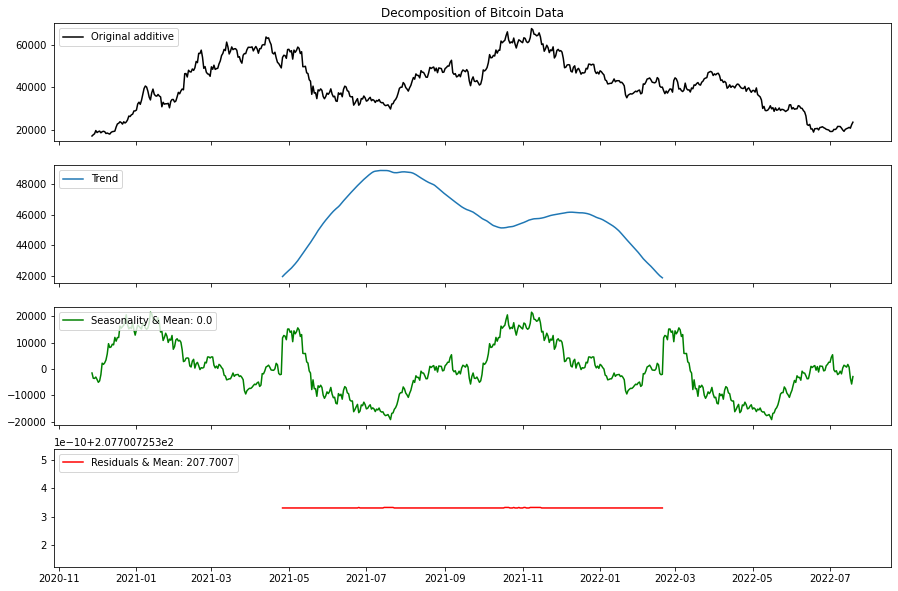

Result: Non-Stationary (H0: non-stationary, p-value: 0.271)


In [12]:
ts_decompose(df_temp, 'additive')

---